### clean_ts.py 
Code for calculating plotting RI time series against national/local averages

@Author: Rachel Anderson

Data sources: 
Criminal statistics from [Uniform Crime Reporting Statistics](https://www.ucrdatatool.gov/Search/Crime/State/TrendsInOneVar.cfm?NoVariables=Y&CFID=293603178&CFTOKEN=9a0c893604048fab-ADC5E6C3-AF48-5E74-001A49C4504491E0)

Population statistics from [World Population Review](http://worldpopulationreview.com/states/)



In [593]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json
import requests

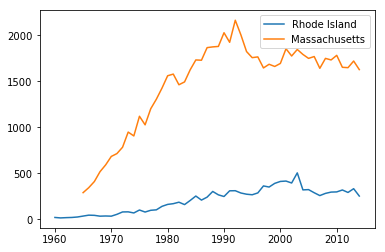

In [594]:
#Clean Plot data
plt.close()

#Read in data
all_but_ri = pd.read_csv('allbutRI.csv').dropna()
all_but_ri = all_but_ri.set_index('Year')
ma_data = pd.DataFrame(all_but_ri.Massachusetts)

ri_data = pd.read_csv('justRI.csv')
ri_data.columns = ['year', 'incidents']
ri_data = ri_data.set_index('year')

#Plot raw series

plt.plot(ri_data.index, ri_data.incidents, label = "Rhode Island")
plt.plot(ma_data.index, ma_data, label = "Massachusetts")
plt.legend()
plt.show()

In [595]:
#Import and clean Population Data, save in dictionary

ma_text = """{ year: '1790', value: 68825 },
{ year: '1800', value: 69122 },
{ year: '1810', value: 76931 },
{ year: '1820', value: 83059 },
{ year: '1830', value: 97199 },
{ year: '1840', value: 108830 },
{ year: '1850', value: 147545 },
{ year: '1860', value: 174620 },
{ year: '1870', value: 217353 },
{ year: '1880', value: 276531 },
{ year: '1890', value: 345506 },
{ year: '1900', value: 428556 },
{ year: '1910', value: 542610 },
{ year: '1920', value: 604397 },
{ year: '1930', value: 687497 },
{ year: '1940', value: 713346 },
{ year: '1950', value: 791896 },
{ year: '1960', value: 859488 },
{ year: '1970', value: 946725 },
{ year: '1980', value: 947154 },
{ year: '1990', value: 1003464 },
{ year: '2000', value: 1048319 },
{ year: '2010', value: 1052567 },
{ year: '2015', value: 1056298 }"""

ri_text = """{ year: '1790', value: 378787 },
{ year: '1800', value: 422845 },
{ year: '1810', value: 472040 },
{ year: '1820', value: 523287 },
{ year: '1830', value: 610408 },
{ year: '1840', value: 737699 },
{ year: '1850', value: 994514 },
{ year: '1860', value: 1231066 },
{ year: '1870', value: 1457351 },
{ year: '1880', value: 1783085 },
{ year: '1890', value: 2238947 },
{ year: '1900', value: 2805346 },
{ year: '1910', value: 3366416 },
{ year: '1920', value: 3852356 },
{ year: '1930', value: 4249614 },
{ year: '1940', value: 4316721 },
{ year: '1950', value: 4690514 },
{ year: '1960', value: 5148578 },
{ year: '1970', value: 5689170 },
{ year: '1980', value: 5737037 },
{ year: '1990', value: 6016425 },
{ year: '2000', value: 6349097 },
{ year: '2010', value: 6547629 },
{ year: '2015', value: 6794422 }"""

ma_pop = {}
ri_pop = {}
states = ["ma", "ri"]

for state in states:  
    text = eval(state + "_text")
    text = text.replace("\n", "")
    text = text.replace("{", "")
    text = text.replace("}", "")
    text = text.replace("year:", "")
    text = text.replace("', value", "")
    text = text.replace("'", "")
    text=text.split(",")
    objects = [i.replace(" ","") for i in text]
    for x in objects:
        temp = x.split(":")
        eval(state + '_pop')[int(temp[0])] = int(temp[1])


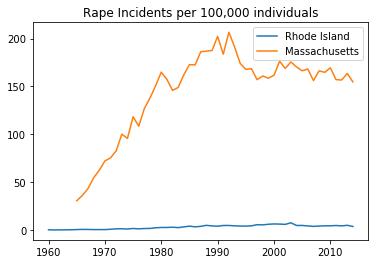

In [596]:
def calc_percap(data):
    """Takes in tuple data = (state, year, incidents) 
    returns percap = incidents/population(closest year available)"""
    year, incidents, state = data[0], data[1], data[2]
    if year > 2010:
        return incidents/(eval(state + '_pop')[2010])
    return incidents/(eval(state + '_pop')[int(math.ceil(year / 10.0)) * 10])

ri_series = []
ma_series = []
n = 100000

states = ["ri", "ma"]
for state in states:
    for row in eval(state+"_data").iterrows():
        index, data = row
        temp = [index, data.tolist()[0]]
        temp.append(state)
        eval(state+"_series").append(calc_percap(temp)*n)

        
plt.plot(ri_data.index, ri_series, label = "Rhode Island")
plt.plot(ma_data.index, ma_series, label = "Massachusetts")
plt.title("Rape Incidents per 100,000 individuals")
plt.legend()
plt.show()